<a href="https://colab.research.google.com/github/shukla7721/RainWaterHarvesting/blob/main/model_rain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter your date in format d-m-y (e.g., 01-01-2024): 02-03-2029
Date 02-03-2029 not found. Using mean values for prediction.
Using mean J_rain: 2.24
Using mean J_temp: 68.28
Using mean J_hum: 48.99
Using mean P_temp: 72.51
Using mean P_hum: 40.35

Predicted rainfall in Phagwara on 02-03-2029: 2.58 mm


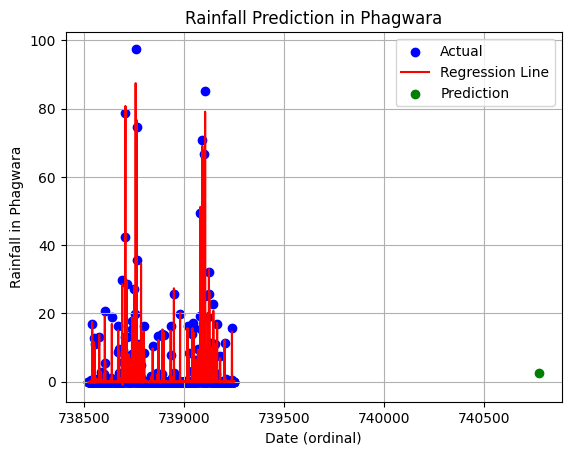

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("https://raw.githubusercontent.com/shukla7721/RainWaterHarvesting/refs/heads/main/jan.csv")
df.columns = df.columns.str.strip()

df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['date_num'] = df['Date'].map(lambda x: x.toordinal())

for col in ['P_hum', 'J_hum']:
    df[col] = df[col].astype(str).str.replace('%', '', regex=False).astype(float)

while True:
    v = input("Enter your date in format d-m-y (e.g., 01-01-2024): ")
    try:
        s = pd.to_datetime(v, format='%d-%m-%Y')
        s_num = s.toordinal()
        break
    except ValueError:
        print("Invalid date format. Please enter the date in d-m-y format (e.g., 01-01-2024).")

features = ['date_num', 'J_rain', 'J_temp', 'J_hum', 'P_temp', 'P_hum']
target = 'P_rain'

df = df.dropna(subset=features + [target])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])
y = df[target]

model = LinearRegression()
model.fit(X_scaled, y)

input_data = {'date_num': [s_num]}
row = df[df['Date'] == s]

if not row.empty:
    for col in features[1:]:
        input_data[col] = [row[col].iloc[0]]
else:
    print(f"Date {v} not found. Using mean values for prediction.")
    for col in features[1:]:
        input_data[col] = [df[col].mean()]
        print(f"Using mean {col}: {df[col].mean():.2f}")

input_df = pd.DataFrame(input_data)
input_scaled = scaler.transform(input_df[features])
prediction = model.predict(input_scaled)[0]

print(f"\nPredicted rainfall in Phagwara on {v}: {prediction:.2f} mm")

# Plot
plt.scatter(df['date_num'], df['P_rain'], color='blue', label='Actual')
plot_features_scaled = scaler.transform(df[features])
predicted_line = model.predict(plot_features_scaled)
plt.plot(df['date_num'], predicted_line, color='red', label='Regression Line')
plt.scatter(s_num, prediction, color='green', label='Prediction')
plt.legend()
plt.xlabel('Date (ordinal)')
plt.ylabel('Rainfall in Phagwara')
plt.title('Rainfall Prediction in Phagwara')
plt.grid(True)
plt.show()